<a href="https://colab.research.google.com/github/Hamzahmadi/MachineLearning/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/Courses/Intro-to-ML/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Problem 1A

In [4]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [5]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [6]:
num_varsa = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

In [7]:
# Separate features and labels
X_train = df_train[num_varsa].values[:, (0,1,2,3,4)]  # get input values from first column -- X is a list here
y_train = df_train[num_varsa].values[:, 5]  # get output values from second column -- Y is the list here
m_train = len(y_train)  # Number of training examples
n_train = len(X_train)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X = ', X_train[: 5])
print('y = ', y_train[: 5])
print('m = ', m_train)
print('n = ', n_train)

X =  [[8050    3    1    1    1]
 [6360    3    2    4    0]
 [6750    2    1    1    2]
 [6420    3    1    1    0]
 [3630    4    1    2    3]]
y =  [8645000 7840000 6419000 5950000 3010000]
m =  436
n =  436


In [8]:
# Separate features and labels
X_test = df_test[num_varsa].values[:, (0,1,2,3,4)]  # get input values from first column -- X is a list here
y_test = df_test[num_varsa].values[:, 5]  # get output values from second column -- Y is the list here
m_test = len(y_test)  # Number of training examples
n_test = len(X_test)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X = ', X_test[: 5])
print('y = ', y_test[: 5])
print('m = ', m_test)
print('n = ', n_test)

X =  [[ 2880     3     1     2     0]
 [ 6000     3     2     2     1]
 [10269     3     1     1     1]
 [ 5320     3     1     2     0]
 [ 4950     4     1     2     0]]
y =  [4403000 7350000 5250000 4550000 4382000]
m =  109
n =  109


In [9]:
X_0train = np.ones((m_train, 1))
X_0train[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [10]:
X_0test = np.ones((m_test, 1))
X_0test[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [11]:
X_1train = X_train.reshape(m_train, 5)
X_1train[:10]

array([[8050,    3,    1,    1,    1],
       [6360,    3,    2,    4,    0],
       [6750,    2,    1,    1,    2],
       [6420,    3,    1,    1,    0],
       [3630,    4,    1,    2,    3],
       [3850,    2,    1,    1,    0],
       [8960,    4,    4,    4,    3],
       [8250,    3,    1,    1,    0],
       [3000,    3,    2,    2,    0],
       [4032,    2,    1,    1,    0]])

In [12]:
X_1test = X_test.reshape(m_test, 5)
X_1test[:10]

array([[ 2880,     3,     1,     2,     0],
       [ 6000,     3,     2,     2,     1],
       [10269,     3,     1,     1,     1],
       [ 5320,     3,     1,     2,     0],
       [ 4950,     4,     1,     2,     0],
       [ 4320,     3,     1,     1,     0],
       [ 6540,     4,     2,     2,     2],
       [ 6540,     4,     2,     2,     0],
       [ 6800,     2,     1,     1,     0],
       [ 6540,     3,     1,     1,     2]])

In [13]:
Xtrain = np.hstack((X_0train, X_1train))
Xtrain[:5]

array([[1.00e+00, 8.05e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 6.36e+03, 3.00e+00, 2.00e+00, 4.00e+00, 0.00e+00],
       [1.00e+00, 6.75e+03, 2.00e+00, 1.00e+00, 1.00e+00, 2.00e+00],
       [1.00e+00, 6.42e+03, 3.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 3.63e+03, 4.00e+00, 1.00e+00, 2.00e+00, 3.00e+00]])

In [14]:
Xtest = np.hstack((X_0test, X_1test))
Xtest[:5]

array([[1.0000e+00, 2.8800e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00],
       [1.0000e+00, 6.0000e+03, 3.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00],
       [1.0000e+00, 1.0269e+04, 3.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 5.3200e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00],
       [1.0000e+00, 4.9500e+03, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00]])

In [15]:
theta = np.zeros(6)
m = len(housing)
print(m)

545


In [16]:
def compute_cost_train(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [17]:
def gradient_descent(X, Xtest, y, y_test, theta, alpha, iterations):
    m_train = len(y)  # Number of training examples
    m_test = len(y_test)  # Number of testing examples
    cost_history_train = np.zeros(iterations)
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        gradients = (2/m_train) * X.transpose().dot(errors)
        theta -= alpha * gradients

        train_loss = (1/m_train) * np.sum(np.square(X.dot(theta) - y))
        cost_history_train[i] = train_loss

        val_loss = (1/m_test) * np.sum(np.square(Xtest.dot(theta) - y_test))
        cost_history_test[i] = val_loss

    return theta, cost_history_train, cost_history_test


In [18]:
iterations = 1500
alpha =  0.000000001

In [19]:
theta, cost_history_train, cost_history_test = gradient_descent(Xtrain, Xtest, y_train, y_test, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history_train, cost_history_test)

Final value of theta = [  1.2253371  861.91048121   4.51279359   2.57703268   3.93395411
   0.96779989]
cost_history = [2.36944282e+13 2.12466211e+13 1.90937682e+13 ... 3.38019315e+12
 3.38019314e+12 3.38019312e+12] [2.24176818e+13 2.00129484e+13 1.79036584e+13 ... 3.21892431e+12
 3.21892429e+12 3.21892428e+12]


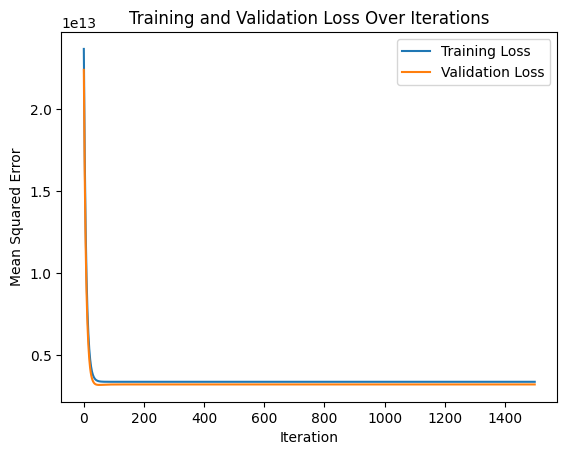

In [20]:
plt.plot(cost_history_train, label="Training Loss")
plt.plot(cost_history_test, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

Problem 1B

In [21]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking','prefarea','price']


In [22]:
# Separate features and labels
X_trainb = df_train[num_vars].values[:, 0:11]  # get input values from first column -- X is a list here
y_trainb = df_train[num_vars].values[:, 11]  # get output values from second column -- Y is the list here
m_trainb = len(y_trainb)  # Number of training examples
n_trainb = len(X_trainb)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X = ', X_trainb[: 5])
print('y = ', y_trainb[: 5])
print('m = ', m_trainb)
print('n = ', n_trainb)

X =  [[8050    3    1    1    1    1    1    0    1    1    0]
 [6360    3    2    4    1    0    0    0    1    0    1]
 [6750    2    1    1    1    1    1    0    0    2    1]
 [6420    3    1    1    1    0    1    0    1    0    1]
 [3630    4    1    2    1    0    0    0    0    3    0]]
y =  [8645000 7840000 6419000 5950000 3010000]
m =  436
n =  436


In [23]:
# Separate features and labels
X_testb = df_test[num_vars].values[:, 0:11]  # get input values from first column -- X is a list here
y_testb = df_test[num_vars].values[:, 11]  # get output values from second column -- Y is the list here
m_testb = len(y_test)  # Number of training examples
n_testb = len(X_test)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X = ', X_test[: 5])
print('y = ', y_test[: 5])
print('m = ', m_test)
print('n = ', n_test)

X =  [[ 2880     3     1     2     0]
 [ 6000     3     2     2     1]
 [10269     3     1     1     1]
 [ 5320     3     1     2     0]
 [ 4950     4     1     2     0]]
y =  [4403000 7350000 5250000 4550000 4382000]
m =  109
n =  109


In [24]:
X_0trainb = np.ones((m_trainb, 1))
X_0testb = np.ones((m_testb, 1))

In [25]:
X_1trainb = X_trainb.reshape(m_trainb, 11)
X_1trainb[:10]

array([[8050,    3,    1,    1,    1,    1,    1,    0,    1,    1,    0],
       [6360,    3,    2,    4,    1,    0,    0,    0,    1,    0,    1],
       [6750,    2,    1,    1,    1,    1,    1,    0,    0,    2,    1],
       [6420,    3,    1,    1,    1,    0,    1,    0,    1,    0,    1],
       [3630,    4,    1,    2,    1,    0,    0,    0,    0,    3,    0],
       [3850,    2,    1,    1,    1,    0,    0,    0,    0,    0,    0],
       [8960,    4,    4,    4,    1,    0,    0,    0,    1,    3,    0],
       [8250,    3,    1,    1,    1,    0,    0,    0,    0,    0,    0],
       [3000,    3,    2,    2,    1,    1,    1,    0,    0,    0,    0],
       [4032,    2,    1,    1,    1,    0,    1,    0,    0,    0,    0]])

In [26]:
X_1testb = X_testb.reshape(m_testb, 11)
X_1testb[:10]

array([[ 2880,     3,     1,     2,     1,     0,     0,     0,     0,
            0,     1],
       [ 6000,     3,     2,     2,     1,     1,     0,     0,     1,
            1,     0],
       [10269,     3,     1,     1,     1,     0,     0,     0,     0,
            1,     1],
       [ 5320,     3,     1,     2,     1,     1,     1,     0,     0,
            0,     1],
       [ 4950,     4,     1,     2,     1,     0,     0,     0,     1,
            0,     0],
       [ 4320,     3,     1,     1,     1,     0,     0,     0,     0,
            0,     1],
       [ 6540,     4,     2,     2,     1,     1,     1,     0,     1,
            2,     1],
       [ 6540,     4,     2,     2,     0,     0,     0,     0,     1,
            0,     0],
       [ 6800,     2,     1,     1,     1,     0,     0,     0,     0,
            0,     0],
       [ 6540,     3,     1,     1,     1,     1,     1,     0,     0,
            2,     1]])

In [27]:
Xtrainb = np.hstack((X_0trainb, X_1trainb))
Xtrainb[:5]

array([[1.00e+00, 8.05e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 6.36e+03, 3.00e+00, 2.00e+00, 4.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00],
       [1.00e+00, 6.75e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 2.00e+00, 1.00e+00],
       [1.00e+00, 6.42e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00],
       [1.00e+00, 3.63e+03, 4.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 3.00e+00, 0.00e+00]])

In [28]:
Xtestb = np.hstack((X_0testb, X_1testb))
Xtestb[:5]

array([[1.0000e+00, 2.8800e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00],
       [1.0000e+00, 6.0000e+03, 3.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00],
       [1.0000e+00, 1.0269e+04, 3.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00],
       [1.0000e+00, 5.3200e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00],
       [1.0000e+00, 4.9500e+03, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00]])

In [29]:
theta1b = np.zeros(12)

In [30]:
iterations1b = 1500
alpha1b = 0.000000001

In [31]:
theta, cost_history_train, cost_history_test = gradient_descent(Xtrainb, Xtestb, y_trainb, y_testb, theta1b, alpha1b, iterations1b)
print('Final value of theta =', theta)
print('cost_history =', cost_history_train, cost_history_test)

Final value of theta = [1.22533683e+00 8.61910190e+02 4.51279273e+00 2.57703229e+00
 3.93395349e+00 1.05758155e+00 4.46888356e-01 7.00118508e-01
 2.10369703e-01 9.70769990e-01 9.67799742e-01 4.79079852e-01]
cost_history = [2.36944281e+13 2.12466209e+13 1.90937679e+13 ... 3.38019131e+12
 3.38019129e+12 3.38019127e+12] [2.24176817e+13 2.00129482e+13 1.79036582e+13 ... 3.21892202e+12
 3.21892200e+12 3.21892198e+12]


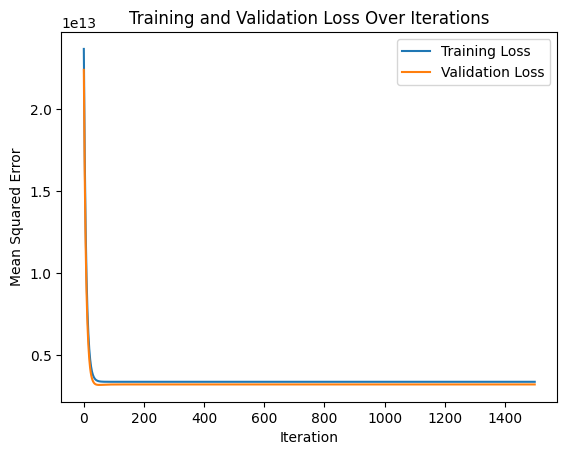

In [32]:
plt.plot(cost_history_train, label="Training Loss")
plt.plot(cost_history_test, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

Problem 2A

In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()#MinMaxScaler()##MinMaxScaler()##MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_varsa= ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_train[num_varsa] = scaler.fit_transform(df_train[num_varsa])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,1.351873,0.078679,-0.579897,-0.929023,1,1,1,0,1,0.311484,0,furnished
41,7840000,0.565326,0.078679,1.410929,2.474792,1,0,0,0,1,-0.849261,1,furnished
91,6419000,0.746837,-1.293483,-0.579897,-0.929023,1,1,1,0,0,1.472229,1,furnished
118,5950000,0.593251,0.078679,-0.579897,-0.929023,1,0,1,0,1,-0.849261,1,furnished
472,3010000,-0.705249,1.450841,-0.579897,0.205582,1,0,0,0,0,2.632974,0,semi-furnished


In [34]:
df_test[num_varsa] = scaler.fit_transform(df_test[num_varsa])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,-1.020953,-0.072023,-0.531775,0.308415,1,0,0,0,0,-0.643743,1,semi-furnished
54,7350000,0.369177,-0.072023,1.466964,0.308415,1,1,0,0,1,0.545545,0,semi-furnished
171,5250000,2.271249,-0.072023,-0.531775,-0.936669,1,0,0,0,0,0.545545,1,semi-furnished
244,4550000,0.066200,-0.072023,-0.531775,0.308415,1,1,1,0,0,-0.643743,1,semi-furnished
268,4382000,-0.098656,1.236396,-0.531775,0.308415,1,0,0,0,1,-0.643743,0,semi-furnished


In [35]:
# Separate features and labels
y_train2a= df_train['price'].values  # get input values from first column -- X is a list here
x_train2a = df_train[num_varsa].values[:, (0,1,2,3,4)]  # get output values from second column -- Y is the list here
m_train2a = len(y_train2a)  # Number of training examples
n_train2a = len(x_train2a)  # Number of training examples

In [36]:
print('X = ', x_train2a[: 5])
print('y = ', y_train2a[: 5])
print('m = ', m_train2a)
print('n = ', n_train2a)

X =  [[ 1.35187274  0.07867901 -0.57989658 -0.92902305  0.31148433]
 [ 0.56532627  0.07867901  1.41092949  2.4747925  -0.8492607 ]
 [ 0.746837   -1.29348292 -0.57989658 -0.92902305  1.47222936]
 [ 0.593251    0.07867901 -0.57989658 -0.92902305 -0.8492607 ]
 [-0.7052488   1.45084094 -0.57989658  0.20558213  2.6329744 ]]
y =  [8645000 7840000 6419000 5950000 3010000]
m =  436
n =  436


In [37]:
# Separate features and labels
y_test2a= df_test['price'].values  # get input values from first column -- X is a list here
x_test2a = df_test[num_varsa].values[:, (0,1,2,3,4)]  # get output values from second column -- Y is the list here
m_test2a = len(y_test2a)  # Number of training examples
n_test2a = len(x_test2a)  # Number of training examples

In [38]:
print('X = ', x_test2a[: 5])
print('y = ', y_test2a[: 5])
print('m = ', m_test2a)
print('n = ', n_test2a)

X =  [[-1.02095327 -0.07202305 -0.53177451  0.30841537 -0.64374278]
 [ 0.3691766  -0.07202305  1.46696416  0.30841537  0.54554473]
 [ 2.27124853 -0.07202305 -0.53177451 -0.93666891  0.54554473]
 [ 0.06619958 -0.07202305 -0.53177451  0.30841537 -0.64374278]
 [-0.09865556  1.23639571 -0.53177451  0.30841537 -0.64374278]]
y =  [4403000 7350000 5250000 4550000 4382000]
m =  109
n =  109


In [39]:
#80 percent of 545 = 436. 20% = 109

X_02a = np.ones((m_train2a, 1))
X_0t2a = np.ones((m_test2a, 1))
X_02a[:5]
X_0t2a[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [40]:
X_12a = x_train2a.reshape(m_train2a, 5)
X_12a[:10]

array([[ 1.35187274,  0.07867901, -0.57989658, -0.92902305,  0.31148433],
       [ 0.56532627,  0.07867901,  1.41092949,  2.4747925 , -0.8492607 ],
       [ 0.746837  , -1.29348292, -0.57989658, -0.92902305,  1.47222936],
       [ 0.593251  ,  0.07867901, -0.57989658, -0.92902305, -0.8492607 ],
       [-0.7052488 ,  1.45084094, -0.57989658,  0.20558213,  2.6329744 ],
       [-0.60285813, -1.29348292, -0.57989658, -0.92902305, -0.8492607 ],
       [ 1.77539777,  1.45084094,  5.39258163,  2.4747925 ,  2.6329744 ],
       [ 1.44495517,  0.07867901, -0.57989658, -0.92902305, -0.8492607 ],
       [-0.99845843,  0.07867901,  1.41092949,  0.20558213, -0.8492607 ],
       [-0.51815313, -1.29348292, -0.57989658, -0.92902305, -0.8492607 ]])

In [41]:
X_1t2a = x_test2a.reshape(m_test2a, 5)
X_1t2a[:10]

array([[-1.02095327, -0.07202305, -0.53177451,  0.30841537, -0.64374278],
       [ 0.3691766 , -0.07202305,  1.46696416,  0.30841537,  0.54554473],
       [ 2.27124853, -0.07202305, -0.53177451, -0.93666891,  0.54554473],
       [ 0.06619958, -0.07202305, -0.53177451,  0.30841537, -0.64374278],
       [-0.09865556,  1.23639571, -0.53177451,  0.30841537, -0.64374278],
       [-0.37935486, -0.07202305, -0.53177451, -0.93666891, -0.64374278],
       [ 0.609776  ,  1.23639571,  1.46696416,  0.30841537,  1.73483223],
       [ 0.609776  ,  1.23639571,  1.46696416,  0.30841537, -0.64374278],
       [ 0.72562016, -1.38044181, -0.53177451, -0.93666891, -0.64374278],
       [ 0.609776  , -0.07202305, -0.53177451, -0.93666891,  1.73483223]])

In [42]:
x_train2a = np.hstack((X_02a, X_12a))
x_train2a[:5]

array([[ 1.        ,  1.35187274,  0.07867901, -0.57989658, -0.92902305,
         0.31148433],
       [ 1.        ,  0.56532627,  0.07867901,  1.41092949,  2.4747925 ,
        -0.8492607 ],
       [ 1.        ,  0.746837  , -1.29348292, -0.57989658, -0.92902305,
         1.47222936],
       [ 1.        ,  0.593251  ,  0.07867901, -0.57989658, -0.92902305,
        -0.8492607 ],
       [ 1.        , -0.7052488 ,  1.45084094, -0.57989658,  0.20558213,
         2.6329744 ]])

In [43]:
x_test2a = np.hstack((X_0t2a, X_1t2a))
x_test2a[:5]

array([[ 1.        , -1.02095327, -0.07202305, -0.53177451,  0.30841537,
        -0.64374278],
       [ 1.        ,  0.3691766 , -0.07202305,  1.46696416,  0.30841537,
         0.54554473],
       [ 1.        ,  2.27124853, -0.07202305, -0.53177451, -0.93666891,
         0.54554473],
       [ 1.        ,  0.06619958, -0.07202305, -0.53177451,  0.30841537,
        -0.64374278],
       [ 1.        , -0.09865556,  1.23639571, -0.53177451,  0.30841537,
        -0.64374278]])

In [44]:
theta2a = np.zeros(6)

In [45]:
iterations2a = 1500
alpha2a = 0.01

In [46]:
theta2a, cost_history_train, cost_history_test = gradient_descent(x_train2a, x_test2a, y_train2a, y_test2a, theta2a, alpha2a, iterations2a)
print('Final value of theta =', theta2a)
print('cost_history =', cost_history_train, cost_history_test)

Final value of theta = [4795729.22018316  729932.3572104    79334.75241901  641264.73546138
  463855.85935051  287331.20855395]
cost_history = [2.54329771e+13 2.44340072e+13 2.34785618e+13 ... 1.52206968e+12
 1.52206968e+12 1.52206968e+12] [2.41295342e+13 2.31464665e+13 2.22073654e+13 ... 1.60988456e+12
 1.60988456e+12 1.60988456e+12]


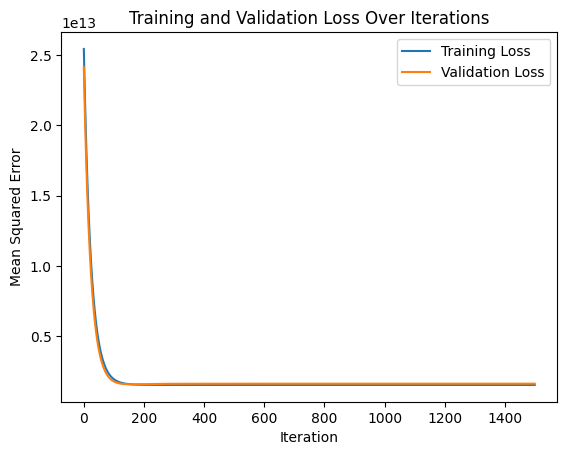

In [47]:
plt.plot(cost_history_train, label="Training Loss")
plt.plot(cost_history_test, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

Problem 2b

In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()#StandardScaler() #

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking','prefarea','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,0.596970,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0,furnished
41,0.527273,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,furnished
91,0.404242,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0,furnished
118,0.363636,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,furnished
472,0.109091,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,semi-furnished


In [49]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,0.248485,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,semi-furnished
54,0.531987,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0,semi-furnished
171,0.329966,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0,semi-furnished
244,0.262626,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0,semi-furnished
268,0.246465,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,semi-furnished


In [50]:
X_train2b = df_train[num_vars].values[:, 0:11]  # get input values from first column -- X is a list here
y_train2b = df_train[num_vars].values[:, 11]  # get output values from second column -- Y is the list here
m_train2b = len(y_train2b)  # Number of training examples
n_train2b = len(X_train2b)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X = ', X_train2b[: 5])
print('y = ', y_train2b[: 5])
print('m = ', m_train2b)
print('n = ', n_train2b)

X =  [[0.4326093  0.4        0.         0.         1.         1.
  1.         0.         1.         0.33333333 0.        ]
 [0.31495405 0.4        0.33333333 1.         1.         0.
  0.         0.         1.         0.         1.        ]
 [0.34210526 0.2        0.         0.         1.         1.
  1.         0.         0.         0.66666667 1.        ]
 [0.31913116 0.4        0.         0.         1.         0.
  1.         0.         1.         0.         1.        ]
 [0.12489557 0.6        0.         0.33333333 1.         0.
  0.         0.         0.         1.         0.        ]]
y =  [0.5969697  0.52727273 0.40424242 0.36363636 0.10909091]
m =  436
n =  436


In [51]:
# Separate features and labels
X_test2b = df_test[num_vars].values[:, 0:11]  # get input values from first column -- X is a list here
y_test2b = df_test[num_vars].values[:, 11]  # get output values from second column -- Y is the list here
m_test2b = len(y_test2b)  # Number of training examples
n_test2b = len(X_test)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X = ', X_test2b[: 5])
print('y = ', y_test2b[: 5])
print('m = ', m_test2b)
print('n = ', n_test2b)

X =  [[0.08817204 0.33333333 0.         0.33333333 1.         0.
  0.         0.         0.         0.         1.        ]
 [0.31182796 0.33333333 0.5        0.33333333 1.         1.
  0.         0.         1.         0.33333333 0.        ]
 [0.61784946 0.33333333 0.         0.         1.         0.
  0.         0.         0.         0.33333333 1.        ]
 [0.26308244 0.33333333 0.         0.33333333 1.         1.
  1.         0.         0.         0.         1.        ]
 [0.23655914 0.66666667 0.         0.33333333 1.         0.
  0.         0.         1.         0.         0.        ]]
y =  [0.24848485 0.53198653 0.32996633 0.26262626 0.24646465]
m =  109
n =  109


In [52]:
X_0train2b = np.ones((m_train2b, 1))
X_0test2b = np.ones((m_test2b, 1))

In [53]:
X_1train2b = X_train2b.reshape(m_train2b, 11)
X_1train2b[:10]

array([[0.4326093 , 0.4       , 0.        , 0.        , 1.        ,
        1.        , 1.        , 0.        , 1.        , 0.33333333,
        0.        ],
       [0.31495405, 0.4       , 0.33333333, 1.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        ],
       [0.34210526, 0.2       , 0.        , 0.        , 1.        ,
        1.        , 1.        , 0.        , 0.        , 0.66666667,
        1.        ],
       [0.31913116, 0.4       , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        1.        ],
       [0.12489557, 0.6       , 0.        , 0.33333333, 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.14021164, 0.2       , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.49596213, 0.6       , 1.        , 1.        , 1.

In [54]:
X_1test2b = X_test2b.reshape(m_test2b, 11)
X_1test2b[:10]

array([[0.08817204, 0.33333333, 0.        , 0.33333333, 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.31182796, 0.33333333, 0.5       , 0.33333333, 1.        ,
        1.        , 0.        , 0.        , 1.        , 0.33333333,
        0.        ],
       [0.61784946, 0.33333333, 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.33333333,
        1.        ],
       [0.26308244, 0.33333333, 0.        , 0.33333333, 1.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.23655914, 0.66666667, 0.        , 0.33333333, 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.19139785, 0.33333333, 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.35053763, 0.66666667, 0.5       , 0.33333333, 1.

In [55]:
Xtrain2b = np.hstack((X_0train2b, X_1train2b))
Xtrain2b[:5]

array([[1.        , 0.4326093 , 0.4       , 0.        , 0.        ,
        1.        , 1.        , 1.        , 0.        , 1.        ,
        0.33333333, 0.        ],
       [1.        , 0.31495405, 0.4       , 0.33333333, 1.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        ],
       [1.        , 0.34210526, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 1.        , 0.        , 0.        ,
        0.66666667, 1.        ],
       [1.        , 0.31913116, 0.4       , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 1.        ],
       [1.        , 0.12489557, 0.6       , 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ]])

In [56]:
Xtest2b = np.hstack((X_0test2b, X_1test2b))
Xtest2b[:5]

array([[1.        , 0.08817204, 0.33333333, 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ],
       [1.        , 0.31182796, 0.33333333, 0.5       , 0.33333333,
        1.        , 1.        , 0.        , 0.        , 1.        ,
        0.33333333, 0.        ],
       [1.        , 0.61784946, 0.33333333, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 1.        ],
       [1.        , 0.26308244, 0.33333333, 0.        , 0.33333333,
        1.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 1.        ],
       [1.        , 0.23655914, 0.66666667, 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ]])

In [57]:
theta2b = np.zeros(12)

In [58]:
def gradient_descent(X, Xtest, y, y_test, theta, alpha, iterations):
    m_train = len(y)  # Number of training examples
    m_test = len(y_test)  # Number of testing examples
    cost_history_train = np.zeros(iterations)
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        gradients = (2/m_train) * X.transpose().dot(errors)
        theta -= alpha * gradients

        train_loss = (1/m_train) * np.sum(np.square(X.dot(theta) - y))
        cost_history_train[i] = train_loss

        val_loss = (1/m_test) * np.sum(np.square(Xtest.dot(theta) - y_test))
        cost_history_test[i] = val_loss

    return theta, cost_history_train, cost_history_test


In [59]:
iterations2b = 1500
alpha2b = 0.1

In [60]:
theta2b, cost_history_train, cost_history_test = gradient_descent(Xtrain2b, Xtest2b, y_train2b, y_test2b, theta2b, alpha2b, iterations2b)
print('Final value of theta =', theta2b)
print('cost_history =', cost_history_train, cost_history_test)

Final value of theta = [0.00062157 0.30672338 0.04501606 0.29873061 0.10792256 0.05313261
 0.03360977 0.02623172 0.07781048 0.07562659 0.06725729 0.05257376]
cost_history = [0.03625022 0.02130074 0.01738271 ... 0.00860915 0.00860915 0.00860914] [0.04291103 0.02570219 0.02063971 ... 0.01187362 0.01187365 0.01187368]


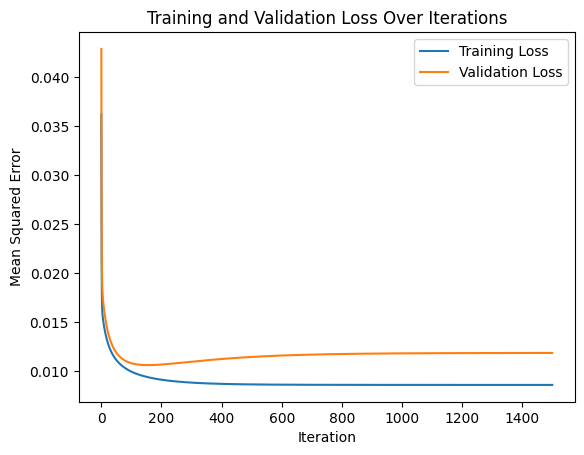

In [61]:
plt.plot(cost_history_train, label="Training Loss")
plt.plot(cost_history_test, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

Problem 3A

In [62]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()#MinMaxScaler()#StandardScaler()#MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_varsa= ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_train[num_varsa] = scaler.fit_transform(df_train[num_varsa])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,0.596970,1.351873,0.078679,-0.579897,-0.929023,1.0,1.0,1.0,0.0,1.0,0.311484,0.0,furnished
41,0.527273,0.565326,0.078679,1.410929,2.474792,1.0,0.0,0.0,0.0,1.0,-0.849261,1.0,furnished
91,0.404242,0.746837,-1.293483,-0.579897,-0.929023,1.0,1.0,1.0,0.0,0.0,1.472229,1.0,furnished
118,0.363636,0.593251,0.078679,-0.579897,-0.929023,1.0,0.0,1.0,0.0,1.0,-0.849261,1.0,furnished
472,0.109091,-0.705249,1.450841,-0.579897,0.205582,1.0,0.0,0.0,0.0,0.0,2.632974,0.0,semi-furnished


In [63]:
# Separate features and labels
y_train3a= df_train['price'].values  # get input values from first column -- X is a list here
x_train3a = df_train[num_varsa].values[:, (0,1,2,3,4)]  # get output values from second column -- Y is the list here
m_train3a = len(y_train3a)  # Number of training examples
n_train3a = len(x_train3a)  # Number of training examples

print('X = ', x_train3a[: 5])
print('y = ', y_train3a[: 5])
print('m = ', m_train3a)
print('n = ', n_train3a)


X =  [[ 1.35187274  0.07867901 -0.57989658 -0.92902305  0.31148433]
 [ 0.56532627  0.07867901  1.41092949  2.4747925  -0.8492607 ]
 [ 0.746837   -1.29348292 -0.57989658 -0.92902305  1.47222936]
 [ 0.593251    0.07867901 -0.57989658 -0.92902305 -0.8492607 ]
 [-0.7052488   1.45084094 -0.57989658  0.20558213  2.6329744 ]]
y =  [0.5969697  0.52727273 0.40424242 0.36363636 0.10909091]
m =  436
n =  436


In [64]:
# Separate features and labels
y_test3a= df_test['price'].values  # get input values from first column -- X is a list here
x_test3a = df_test[num_varsa].values[:, (0,1,2,3,4)]  # get output values from second column -- Y is the list here
m_test3a = len(y_test3a)  # Number of training examples
n_test3a = len(x_test3a)  # Number of training examples


print('X = ', x_test3a[: 5])
print('y = ', y_test3a[: 5])
print('m = ', m_test3a)
print('n = ', n_test3a)

X =  [[0.08817204 0.33333333 0.         0.33333333 0.        ]
 [0.31182796 0.33333333 0.5        0.33333333 0.33333333]
 [0.61784946 0.33333333 0.         0.         0.33333333]
 [0.26308244 0.33333333 0.         0.33333333 0.        ]
 [0.23655914 0.66666667 0.         0.33333333 0.        ]]
y =  [0.24848485 0.53198653 0.32996633 0.26262626 0.24646465]
m =  109
n =  109


In [65]:
X_03a = np.ones((m_train3a, 1))
X_0t3a = np.ones((m_test3a, 1))
X_03a[:5]
X_0t3a[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [66]:
X_13a = x_train3a.reshape(m_train3a, 5)
X_13a[:10]


array([[ 1.35187274,  0.07867901, -0.57989658, -0.92902305,  0.31148433],
       [ 0.56532627,  0.07867901,  1.41092949,  2.4747925 , -0.8492607 ],
       [ 0.746837  , -1.29348292, -0.57989658, -0.92902305,  1.47222936],
       [ 0.593251  ,  0.07867901, -0.57989658, -0.92902305, -0.8492607 ],
       [-0.7052488 ,  1.45084094, -0.57989658,  0.20558213,  2.6329744 ],
       [-0.60285813, -1.29348292, -0.57989658, -0.92902305, -0.8492607 ],
       [ 1.77539777,  1.45084094,  5.39258163,  2.4747925 ,  2.6329744 ],
       [ 1.44495517,  0.07867901, -0.57989658, -0.92902305, -0.8492607 ],
       [-0.99845843,  0.07867901,  1.41092949,  0.20558213, -0.8492607 ],
       [-0.51815313, -1.29348292, -0.57989658, -0.92902305, -0.8492607 ]])

In [67]:
X_1t3a = x_test3a.reshape(m_test3a, 5)
X_1t3a[:10]

array([[0.08817204, 0.33333333, 0.        , 0.33333333, 0.        ],
       [0.31182796, 0.33333333, 0.5       , 0.33333333, 0.33333333],
       [0.61784946, 0.33333333, 0.        , 0.        , 0.33333333],
       [0.26308244, 0.33333333, 0.        , 0.33333333, 0.        ],
       [0.23655914, 0.66666667, 0.        , 0.33333333, 0.        ],
       [0.19139785, 0.33333333, 0.        , 0.        , 0.        ],
       [0.35053763, 0.66666667, 0.5       , 0.33333333, 0.66666667],
       [0.35053763, 0.66666667, 0.5       , 0.33333333, 0.        ],
       [0.36917563, 0.        , 0.        , 0.        , 0.        ],
       [0.35053763, 0.33333333, 0.        , 0.        , 0.66666667]])

In [68]:
x_train3a = np.hstack((X_03a, X_13a))
x_train3a[:5]

array([[ 1.        ,  1.35187274,  0.07867901, -0.57989658, -0.92902305,
         0.31148433],
       [ 1.        ,  0.56532627,  0.07867901,  1.41092949,  2.4747925 ,
        -0.8492607 ],
       [ 1.        ,  0.746837  , -1.29348292, -0.57989658, -0.92902305,
         1.47222936],
       [ 1.        ,  0.593251  ,  0.07867901, -0.57989658, -0.92902305,
        -0.8492607 ],
       [ 1.        , -0.7052488 ,  1.45084094, -0.57989658,  0.20558213,
         2.6329744 ]])

In [69]:
x_test3a = np.hstack((X_0t3a, X_1t3a))
x_test3a[:5]

array([[1.        , 0.08817204, 0.33333333, 0.        , 0.33333333,
        0.        ],
       [1.        , 0.31182796, 0.33333333, 0.5       , 0.33333333,
        0.33333333],
       [1.        , 0.61784946, 0.33333333, 0.        , 0.        ,
        0.33333333],
       [1.        , 0.26308244, 0.33333333, 0.        , 0.33333333,
        0.        ],
       [1.        , 0.23655914, 0.66666667, 0.        , 0.33333333,
        0.        ]])

In [70]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [71]:
def gradient_descentS(X, Xtest, y, y_test, theta, alpha, iterations):
    m_train = len(y_train3a)
    m_test = len(y_test3a)
    cost_history_train = np.zeros(iterations)
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        gradients = (2/m_train) * X.transpose().dot(errors) + lambdaa * theta[:1]
        theta -= alpha * gradients

        train_loss = (1/m_train) * np.sum(np.square(X.dot(theta) - y)) + (lambdaa / (2 * m_train)) * np.sum(np.square(theta[1:]))
        cost_history_train[i] = train_loss

        val_loss = (1/m_test) * np.sum(np.square(Xtest.dot(theta) - y_test))
        cost_history_test[i] = val_loss

    return theta, cost_history_train, cost_history_test


In [72]:
theta = np.zeros(6)
iterations3a = 1500
alpha3a = 0.01
lambdaa = 1

In [73]:
theta, cost_history_train, cost_history_test = gradient_descentS(x_train3a, x_test3a, y_train3a, y_test3a, theta, alpha3a, iterations3a)
print('Final value of theta =', theta)
print('cost_history =', cost_history_train, cost_history_test)


Final value of theta = [ 0.17579967  0.01035033 -0.02891624  0.01819609 -0.01567801 -0.03370917]
cost_history = [0.09185615 0.08834101 0.08504948 ... 0.04026857 0.04026857 0.04026857] [0.10283726 0.09911856 0.09564519 ... 0.04795767 0.04795767 0.04795767]


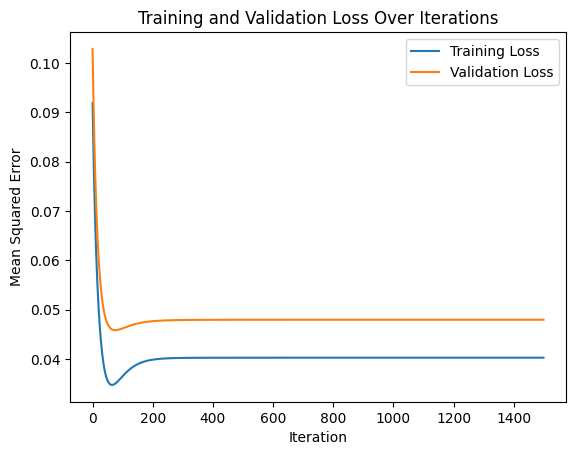

In [74]:
plt.plot(cost_history_train, label="Training Loss")
plt.plot(cost_history_test, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

Problem 3B

In [75]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()#StandardScaler() #


num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking','prefarea','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

X_train3b = df_train[num_vars].values[:, 0:11]  # get input values from first column -- X is a list here
y_train3b = df_train[num_vars].values[:, 11]  # get output values from second column -- Y is the list here
m_train3b = len(y_train3b)  # Number of training examples
n_train3b = len(X_train3b)  # Number of training examples




# Display first 5 records and the total number of training examples
print('X = ', X_train3b[: 5])
print('y = ', y_train3b[: 5])
print('m = ', m_train3b)
print('n = ', n_train3b)


# Separate features and labels
X_test3b = df_test[num_vars].values[:, 0:11]  # get input values from first column -- X is a list here
y_test3b = df_test[num_vars].values[:, 11]  # get output values from second column -- Y is the list here
m_test3b = len(y_test3b)  # Number of training examples
n_test3b = len(X_test)  # Number of training examples




# Display first 5 records and the total number of training examples
print('X = ', X_test3b[: 5])
print('y = ', y_test3b[: 5])
print('m = ', m_test3b)
print('n = ', n_test3b)
X_0train3b = np.ones((m_train3b, 1))
X_0test3b = np.ones((m_test3b, 1))

X_1train3b = X_train3b.reshape(m_train3b, 11)
X_1train3b[:10]


X_1test3b = X_test3b.reshape(m_test3b, 11)
X_1test3b[:10]

Xtrain3b = np.hstack((X_0train3b, X_1train3b))
Xtrain3b[:5]

Xtest3b = np.hstack((X_0test2b, X_1test3b))
Xtest3b[:5]






X =  [[0.4326093  0.4        0.         0.         1.         1.
  1.         0.         1.         0.33333333 0.        ]
 [0.31495405 0.4        0.33333333 1.         1.         0.
  0.         0.         1.         0.         1.        ]
 [0.34210526 0.2        0.         0.         1.         1.
  1.         0.         0.         0.66666667 1.        ]
 [0.31913116 0.4        0.         0.         1.         0.
  1.         0.         1.         0.         1.        ]
 [0.12489557 0.6        0.         0.33333333 1.         0.
  0.         0.         0.         1.         0.        ]]
y =  [0.5969697  0.52727273 0.40424242 0.36363636 0.10909091]
m =  436
n =  436
X =  [[0.08817204 0.33333333 0.         0.33333333 1.         0.
  0.         0.         0.         0.         1.        ]
 [0.31182796 0.33333333 0.5        0.33333333 1.         1.
  0.         0.         1.         0.33333333 0.        ]
 [0.61784946 0.33333333 0.         0.         1.         0.
  0.         0.        

array([[1.        , 0.08817204, 0.33333333, 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ],
       [1.        , 0.31182796, 0.33333333, 0.5       , 0.33333333,
        1.        , 1.        , 0.        , 0.        , 1.        ,
        0.33333333, 0.        ],
       [1.        , 0.61784946, 0.33333333, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 1.        ],
       [1.        , 0.26308244, 0.33333333, 0.        , 0.33333333,
        1.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 1.        ],
       [1.        , 0.23655914, 0.66666667, 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ]])

In [76]:
theta3b = np.zeros(12)

iterations3b = 1500
alpha3b = 0.01
lambdaa = 0.1

In [77]:
theta, cost_history_train, cost_history_test = gradient_descentS(Xtrain3b, Xtest3b, y_train3b, y_test3b, theta3b, alpha3b, iterations3b)
print('Final value of theta =', theta)
print('cost_history =', cost_history_train, cost_history_test)

Final value of theta = [0.03759726 0.11719778 0.05049992 0.14527959 0.10958077 0.06735417
 0.04082697 0.02405446 0.03447437 0.08728113 0.0838019  0.0535177 ]
cost_history = [0.08789618 0.08094362 0.07467903 ... 0.01022653 0.01022528 0.01022404] [0.09863886 0.09124736 0.08456726 ... 0.01124974 0.0112489  0.01124806]


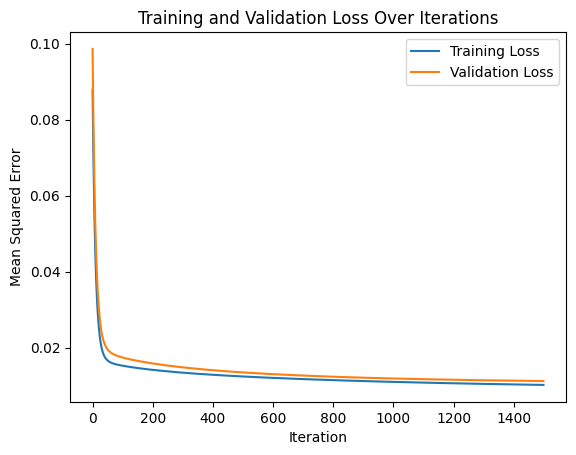

In [78]:
plt.plot(cost_history_train, label="Training Loss")
plt.plot(cost_history_test, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()